Jessica Menendez      
Ignacio Amarilla


El objetivo principal de este proyecto es predecir si un cliente potencial realizará una compra o no, basado en un conjunto de datos con información demográfica, financiera y de contacto de 1000 clientes.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Cargamos el dataframe con la base de datos
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data Science/Machine Learning/Obligatorio/Clientes_Proyecto_ML.xlsx')
data.head()

,Año_contacto,Mes_contacto,Género,Nacionalidad,Estado_civil,Edad,Tipo_propiedad,Valor_consulta,Compra
0,2020,11.0,Femenino,Europea,Divorciado,57,Campo,1974854,Si
1,2020,10.0,Masculino,Chilena,Viudo,79,Campo,2743330,Si
2,2020,4.0,Masculino,Brasilera,Viudo,75,Apartamento,1967787,Si
3,2020,5.0,Masculino,Chilena,Casado,35,Campo,2755365,No
4,2020,4.0,Femenino,Brasilera,Divorciado,76,Campo,3236068,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Año_contacto    1000 non-null   int64  
 1   Mes_contacto    980 non-null    float64
 2   Género          980 non-null    object 
 3   Nacionalidad    1000 non-null   object 
 4   Estado_civil    1000 non-null   object 
 5   Edad            1000 non-null   int64  
 6   Tipo_propiedad  1000 non-null   object 
 7   Valor_consulta  1000 non-null   int64  
 8   Compra          1000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [5]:
# 1. Preprocesamiento de datos
# Manejo de valores nulos
data['Mes_contacto'].fillna(data['Mes_contacto'].mode()[0], inplace=True)
# Rellenamos los valores nulos en 'Género' con 'Desconocido'
data['Género'].fillna('Desconocido', inplace=True)

<ipython-input-5-19089fe9b195>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Mes_contacto'].fillna(data['Mes_contacto'].mode()[0], inplace=True)
<ipython-input-5-19089fe9b195>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Año_contacto    1000 non-null   int64  
 1   Mes_contacto    1000 non-null   float64
 2   Género          1000 non-null   object 
 3   Nacionalidad    1000 non-null   object 
 4   Estado_civil    1000 non-null   object 
 5   Edad            1000 non-null   int64  
 6   Tipo_propiedad  1000 non-null   object 
 7   Valor_consulta  1000 non-null   int64  
 8   Compra          1000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [7]:
# Codificamos las variables categóricas
categorical_cols = ['Género', 'Nacionalidad', 'Estado_civil', 'Tipo_propiedad', 'Compra']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [8]:
# Escalamos las variables numéricas
scaler = StandardScaler()
numerical_cols = ['Edad', 'Valor_consulta']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [9]:
# 2. Separamos variables independientes (X) y dependiente (y)
X = data.drop(columns=['Compra_Si'])
y = data['Compra_Si']  # '1' si compró, '0' si no compró

In [10]:
# Dividimos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# 3. Definir el modelo
rf = RandomForestClassifier(random_state=42)

In [12]:
# Optimización de hiperparámetros con GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search con validación cruzada
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [13]:
# Mejor modelo
best_model = grid_search.best_estimator_
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [14]:
# 4. Cross Validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print("Promedio de cross-validation:", np.mean(cv_scores))

Promedio de cross-validation: 0.6675000000000001


In [15]:
# 5. Entrenamiento y evaluación
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [16]:
# Métricas de evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.665
Classification Report:
               precision    recall  f1-score   support

       False       0.68      0.96      0.80       136
        True       0.29      0.03      0.06        64

    accuracy                           0.67       200
   macro avg       0.48      0.50      0.43       200
weighted avg       0.55      0.67      0.56       200

Confusion Matrix:
 [[131   5]
 [ 62   2]]


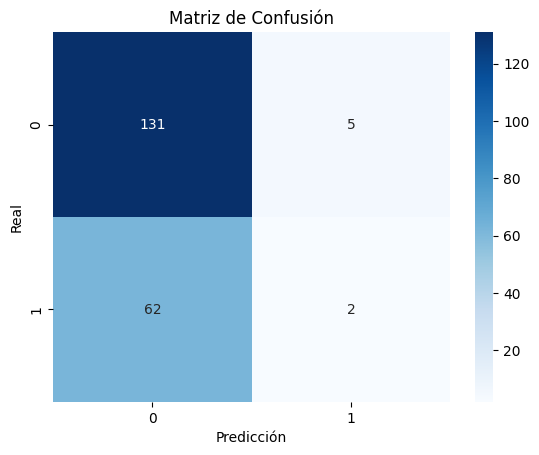

In [17]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [18]:
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print("Puntajes de validación cruzada:", cv_scores)
print("Promedio de validación cruzada:", cv_scores.mean())

Puntajes de validación cruzada: [0.645 0.67  0.675 0.67  0.665]
Promedio de validación cruzada: 0.665


In [19]:
# 7. Sugerencias para mejorar
print("\nSugerencias para mejorar:")
print("1. Probar con otros modelos como Gradient Boosting, XGBoost o LightGBM.")
print("2. Aumentar la cantidad de datos si es posible.")
print("3. Ajustar más hiperparámetros en el grid search para una optimización más fina.")
print("4. Realizar análisis más detallados de las características para seleccionar las más relevantes.")


Sugerencias para mejorar:
1. Probar con otros modelos como Gradient Boosting, XGBoost o LightGBM.
2. Aumentar la cantidad de datos si es posible.
3. Ajustar más hiperparámetros en el grid search para una optimización más fina.
4. Realizar análisis más detallados de las características para seleccionar las más relevantes.
